In [53]:
import os
import sys

import pandas as pd
import geopandas as gpd

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

In [64]:
gdf = aup.gdf_from_db("mpos_2020", "marco")
m = ['01001','01005','01011']
mun_gdf = gpd.GeoDataFrame()
for mun in m:
    mun_gdf = mun_gdf.append(gdf.loc[gdf.CVEGEO == mun])
mun_gdf.head(1)

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry
0,01001,01,001,Aguascalientes,"POLYGON ((-102.10641 22.06035, -102.10368 22.0..."


<AxesSubplot:>

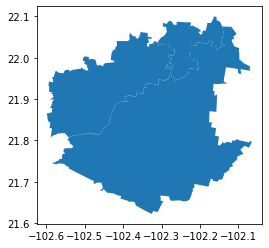

In [65]:
mun_gdf.plot()

<AxesSubplot:>

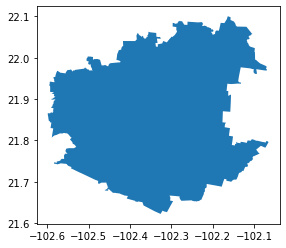

In [56]:
mun_gdf.dissolve().plot()

In [57]:
mun_gdf.dissolve().geometry.to_wkt()[0]

'POLYGON ((-102.1064122496705 22.06035442028543, -102.1036806804546 22.05741025982062, -102.1037053096439 22.05733533981396, -102.1041767702309 22.057143800086, -102.1044154823428 22.05727448979311, -102.1044158301311 22.05727468018102, -102.1047553955196 22.0576281112369, -102.1047567102254 22.05762948011104, -102.1050100598386 22.0577069803111, -102.1057834195893 22.05742804969321, -102.1060273095785 22.05708865018293, -102.1060433401274 22.05641367983642, -102.1058183697116 22.05597771001628, -102.1063639703573 22.05573255007904, -102.10633694988 22.0549706299347, -102.1077511200741 22.05443368003456, -102.1086933098925 22.05385802980812, -102.1089065204497 22.05358902969497, -102.1094669498757 22.05360588976222, -102.110162838869 22.05344731244584, -102.1102301203175 22.05343197986529, -102.1103234697539 22.05341271987108, -102.1109913396827 22.05327491964061, -102.1111635397178 22.05318814958703, -102.1113141200927 22.0528519802508, -102.1116206435876 22.05216760809675, -102.11165

In [58]:
query = f"SELECT * FROM osmnx_new.nodes WHERE ST_Intersects(geometry, \'SRID=4326;{mun_gdf.dissolve().geometry.to_wkt()[0]}\')"
nodes = aup.gdf_from_query(query, geometry_col='geometry')

<AxesSubplot:>

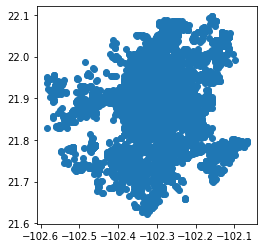

In [59]:
nodes.plot()

<AxesSubplot:>

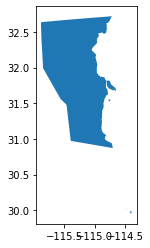

In [60]:
mun_gdf = gdf.loc[gdf.CVEGEO == '02002']
mun_gdf.plot()

<AxesSubplot:>

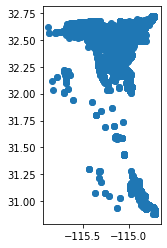

In [61]:
poly_wkt = mun_gdf.dissolve().geometry.to_wkt()[0]
query = f"SELECT * FROM osmnx_new.nodes WHERE ST_Intersects(geometry, \'SRID=4326;{poly_wkt}\')"
nodes = aup.gdf_from_query(query, geometry_col='geometry')
nodes.plot()

In [66]:
# Reads mun_gdf GeoDataFrame as polygon
poly = mun_gdf.geometry
# Extracts coordinates from polygon as DataFrame
coord_val = poly.bounds
# Gets coordinates for bounding box
n = coord_val.maxy.max()
s = coord_val.miny.min()
e = coord_val.maxx.max()
w = coord_val.minx.min()

In [68]:
import osmnx as ox

In [69]:
G = ox.graph_from_bbox(n, s, e, w, network_type="all")

In [70]:
nodes, edges = ox.graph_to_gdfs(G)

In [71]:
edges.head(2)

osmid          name      highway  oneway  \
u         v          key                                                 
301189389 1408187972 0    713153965  Constitución  residential   False   
          301191695  0    715583650  Constitución  residential   False   

                          length lanes  \
u         v          key                 
301189389 1408187972 0    13.812   NaN   
          301191695  0    17.008   NaN   

                                                                   geometry  \
u         v          key                                                      
301189389 1408187972 0    LINESTRING (-102.34221 21.84854, -102.34219 21...   
          301191695  0    LINESTRING (-102.34221 21.84854, -102.34223 21...   

                         maxspeed  ref bridge junction tunnel service access  \
u         v          key                                                       
301189389 1408187972 0        NaN  NaN    NaN      NaN    NaN     NaN    NaN   
          301191695  0        NaN  NaN    NaN      NaN    NaN     NaN    NaN   

                         width  
u         v          key        
301189389 1408187972 0     NaN  
          301191695  0     NaN

In [75]:
edges.reset_index().groupby('key').count()

,u,v,osmid,name,highway,oneway,length,lanes,geometry,maxspeed,ref,bridge,junction,tunnel,service,access,width
key,,,,,,,,,,,,,,,,,
0,129924,129924,129924,55592,129924,129924,129924,14179,129924,7324,6984,473,616,106,1065,274,56
1,1607,1607,1607,163,1607,1607,1607,26,1607,14,6,4,0,1,5,4,4
2,6,6,6,2,6,6,6,0,6,0,0,0,0,0,0,0,0
